In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import torch

### <b> Exploratory Data Analysis <b>

In [58]:
lettuce_df = pd.read_csv("trial_lettuce_dataset.csv")
lettuce_df

,Plant_ID,Date,Temperature (C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5
...,...,...,...,...,...,...,...
3164,70,9/13/2023,19.4,72,475,6.1,42
3165,70,9/14/2023,22.5,80,668,6.7,43
3166,70,9/15/2023,22.5,62,476,6.6,44
3167,70,9/16/2023,24.6,79,621,6.0,45


In [9]:
lettuce_df.describe()

,Plant_ID,Temperature (C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


In [14]:
lettuce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plant_ID         3169 non-null   int64  
 1   Date             3169 non-null   object 
 2   Temperature (C)  3169 non-null   float64
 3   Humidity (%)     3169 non-null   int64  
 4   TDS Value (ppm)  3169 non-null   int64  
 5   pH Level         3169 non-null   float64
 6   Growth Days      3169 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.4+ KB


<b> Null values per column: </b>

In [16]:
lettuce_df.isnull().sum()

Plant_ID           0
Date               0
Temperature (C)    0
Humidity (%)       0
TDS Value (ppm)    0
pH Level           0
Growth Days        0
dtype: int64

<b> Unique values: </b>

In [49]:
lettuce_df.nunique()

Plant_ID            70
Date                48
Temperature (C)     98
Humidity (%)        31
TDS Value (ppm)    401
pH Level             9
Growth Days         48
dtype: int64

<b> Column correlation: </b>

In [36]:
lettuce_df['Date'] = pd.to_datetime(lettuce_df['Date']) #otherwise there's a Type Error when using .corr()
lettuce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Plant_ID         3169 non-null   int64         
 1   Date             3169 non-null   datetime64[ns]
 2   Temperature (C)  3169 non-null   float64       
 3   Humidity (%)     3169 non-null   int64         
 4   TDS Value (ppm)  3169 non-null   int64         
 5   pH Level         3169 non-null   float64       
 6   Growth Days      3169 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 173.4 KB


In [46]:
corr_matrix = lettuce_df.corr()
corr_matrix

,Plant_ID,Date,Temperature (C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
Plant_ID,1.000000,-0.005159,-0.670891,-0.031960,0.011703,-0.014827,-0.005229
Date,-0.005159,1.000000,-0.074549,-0.014531,-0.020667,0.003043,0.999997
Temperature (C),-0.670891,-0.074549,1.000000,0.028158,-0.011797,0.014120,-0.074601
Humidity (%),-0.031960,-0.014531,0.028158,1.000000,-0.006148,0.017195,-0.014481
TDS Value (ppm),0.011703,-0.020667,-0.011797,-0.006148,1.000000,-0.014981,-0.020633
pH Level,-0.014827,0.003043,0.014120,0.017195,-0.014981,1.000000,0.003023
Growth Days,-0.005229,0.999997,-0.074601,-0.014481,-0.020633,0.003023,1.000000


<b> Visual Representation: </b>

<Axes: >

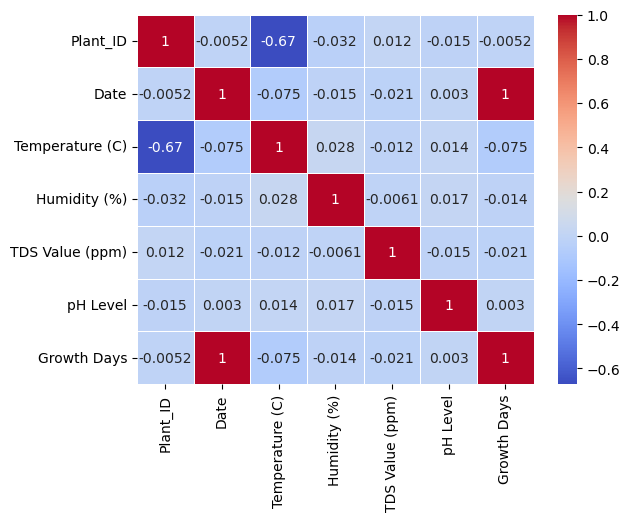

In [57]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

<b> Set Date column as Index </b>

In [61]:
lettuce_df = lettuce_df.set_index('Date')

In [62]:
lettuce_df

,Plant_ID,Temperature (C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
Date,,,,,,
8/3/2023,1,33.4,53,582,6.4,1
8/4/2023,1,33.5,53,451,6.1,2
8/5/2023,1,33.4,59,678,6.4,3
8/6/2023,1,33.4,68,420,6.4,4
8/7/2023,1,33.4,74,637,6.5,5
...,...,...,...,...,...,...
9/13/2023,70,19.4,72,475,6.1,42
9/14/2023,70,22.5,80,668,6.7,43
9/15/2023,70,22.5,62,476,6.6,44


<b> Plot Environmental Variables for a given plant</b>

In [82]:
temp = lettuce_df[lettuce_df["Plant_ID"]==1]["Temperature (C)"]

In [150]:
#Function that allows you to plot the values of the Envionmental Variables for a given plant
def environmentVariables(df, plant):
    
    plt.figure(figsize=(24,12))
    
    temp = df[df["Plant_ID"]==plant]["Temperature (C)"]
    hum = df[df["Plant_ID"]==plant]["Humidity (%)"]
    tds = df[df["Plant_ID"]==plant]["TDS Value (ppm)"]
    ph = df[df["Plant_ID"]==plant]["pH Level"]

    plt.suptitle(f"Environmental Variables for plant {plant}:", fontsize=15, y=1.0)
    
    plt.subplot(221)
    plt.plot(temp, label="Temperature (C)", color='r')
    plt.title("Temperature (C)")
    plt.xticks(rotation=45)

    plt.subplot(222)
    plt.plot(hum, label="Humidity (%)", color='b')
    plt.title("Humidity (%)")
    plt.xticks(rotation=45)

    plt.subplot(223)
    plt.plot(tds, label="TDS Value (ppm)", color='y')
    plt.title("TDS Value (ppm)")
    plt.xticks(rotation=45)

    plt.subplot(224)
    plt.plot(ph, label="pH Level", color='g')
    plt.title("pH Level")
    plt.xticks(rotation=45)

    plt.tight_layout()

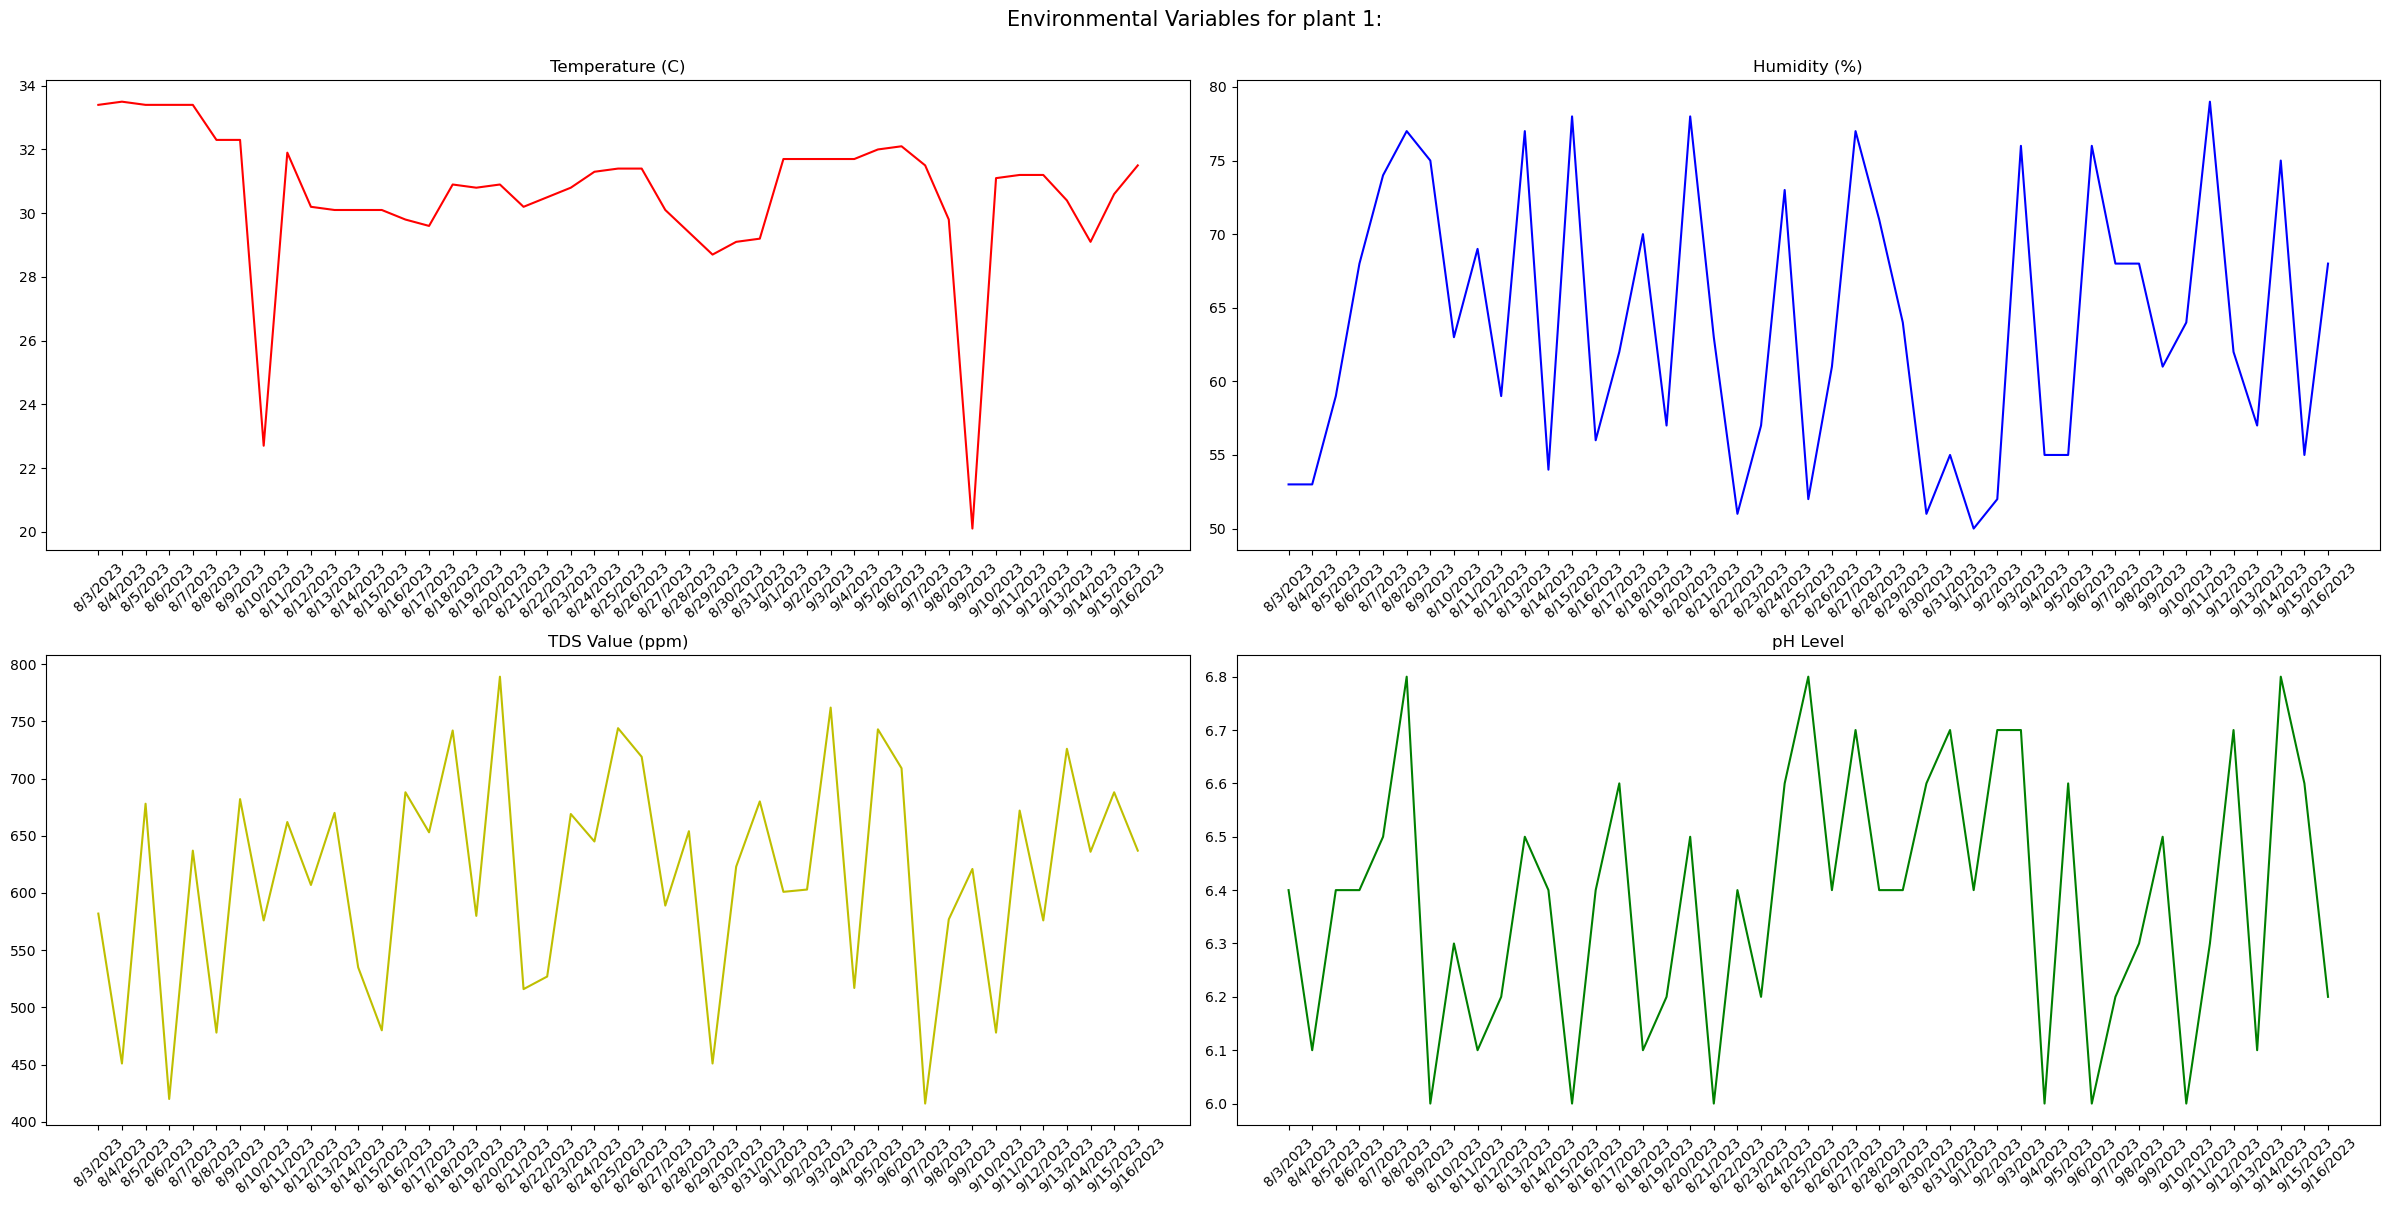

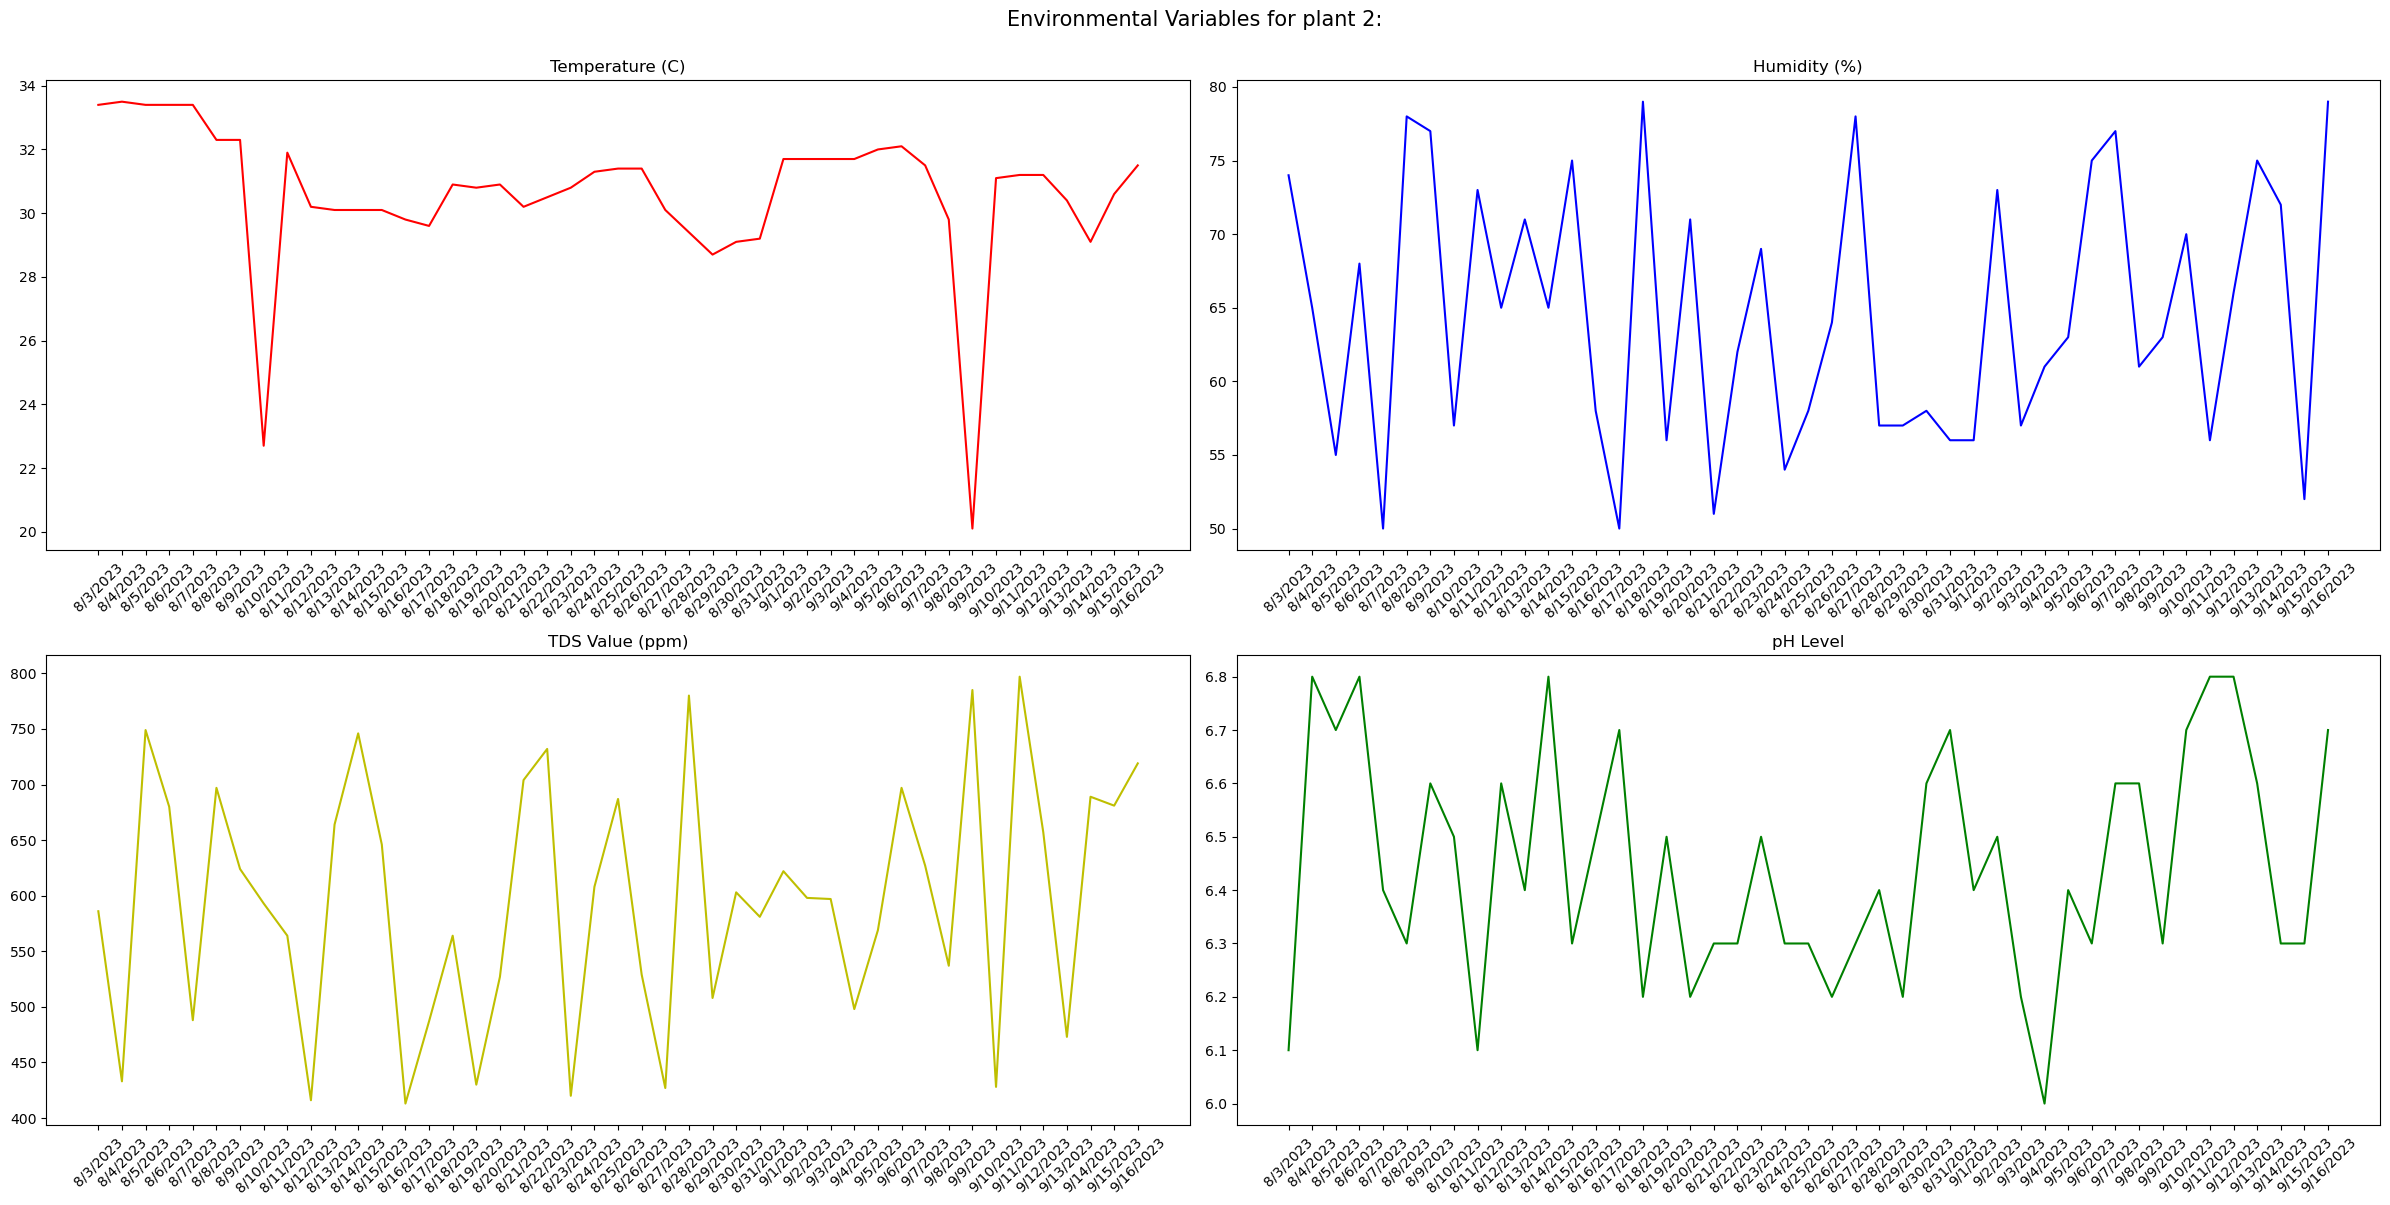

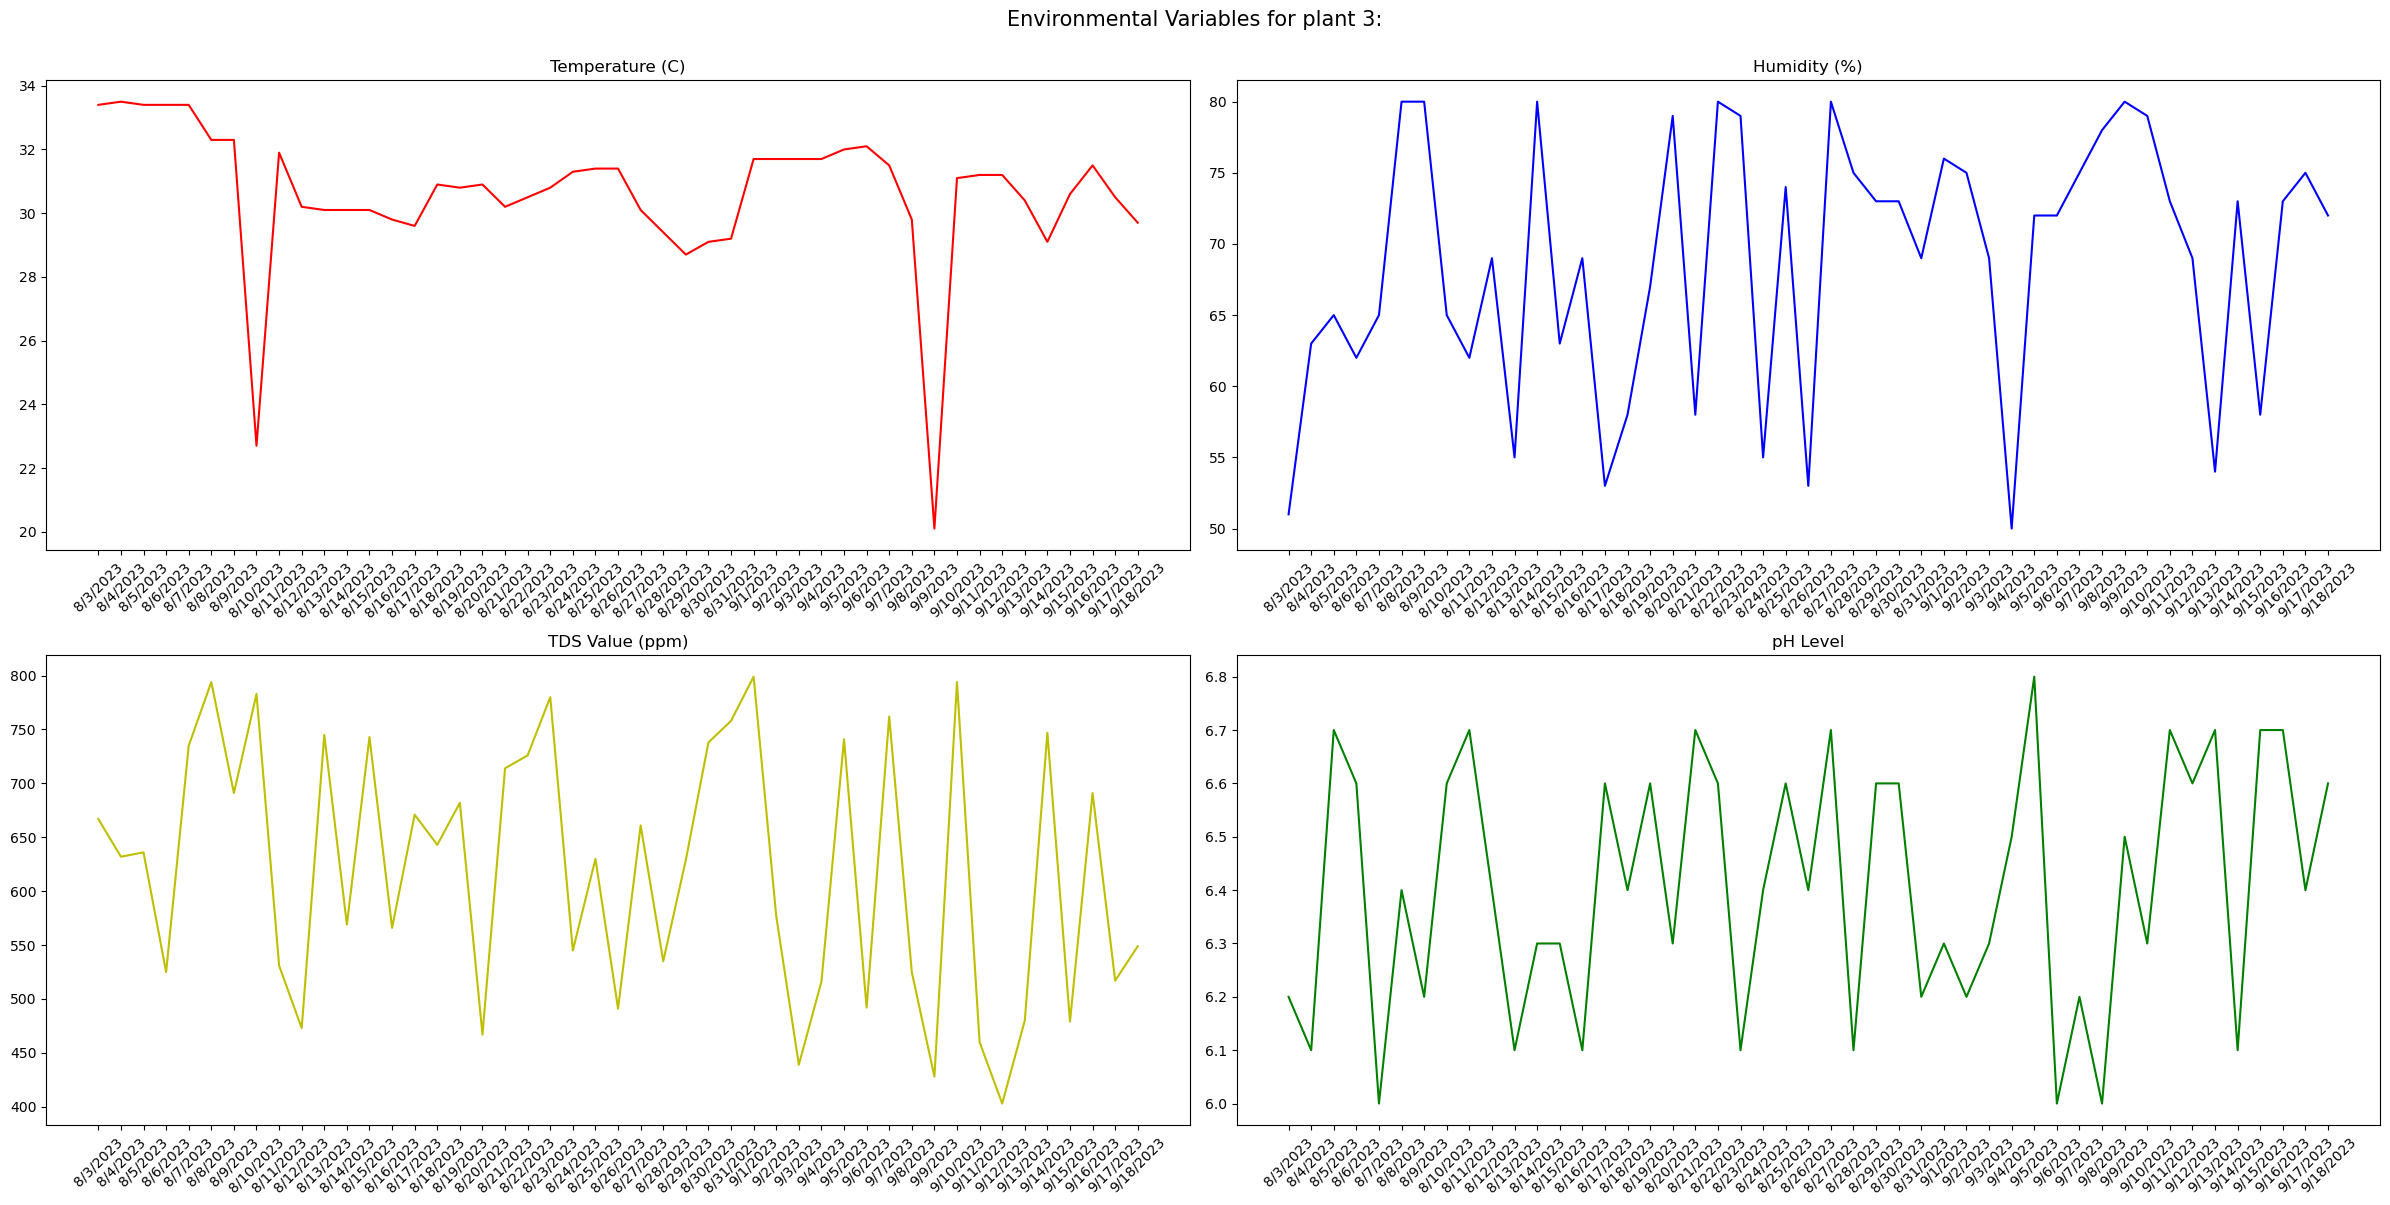

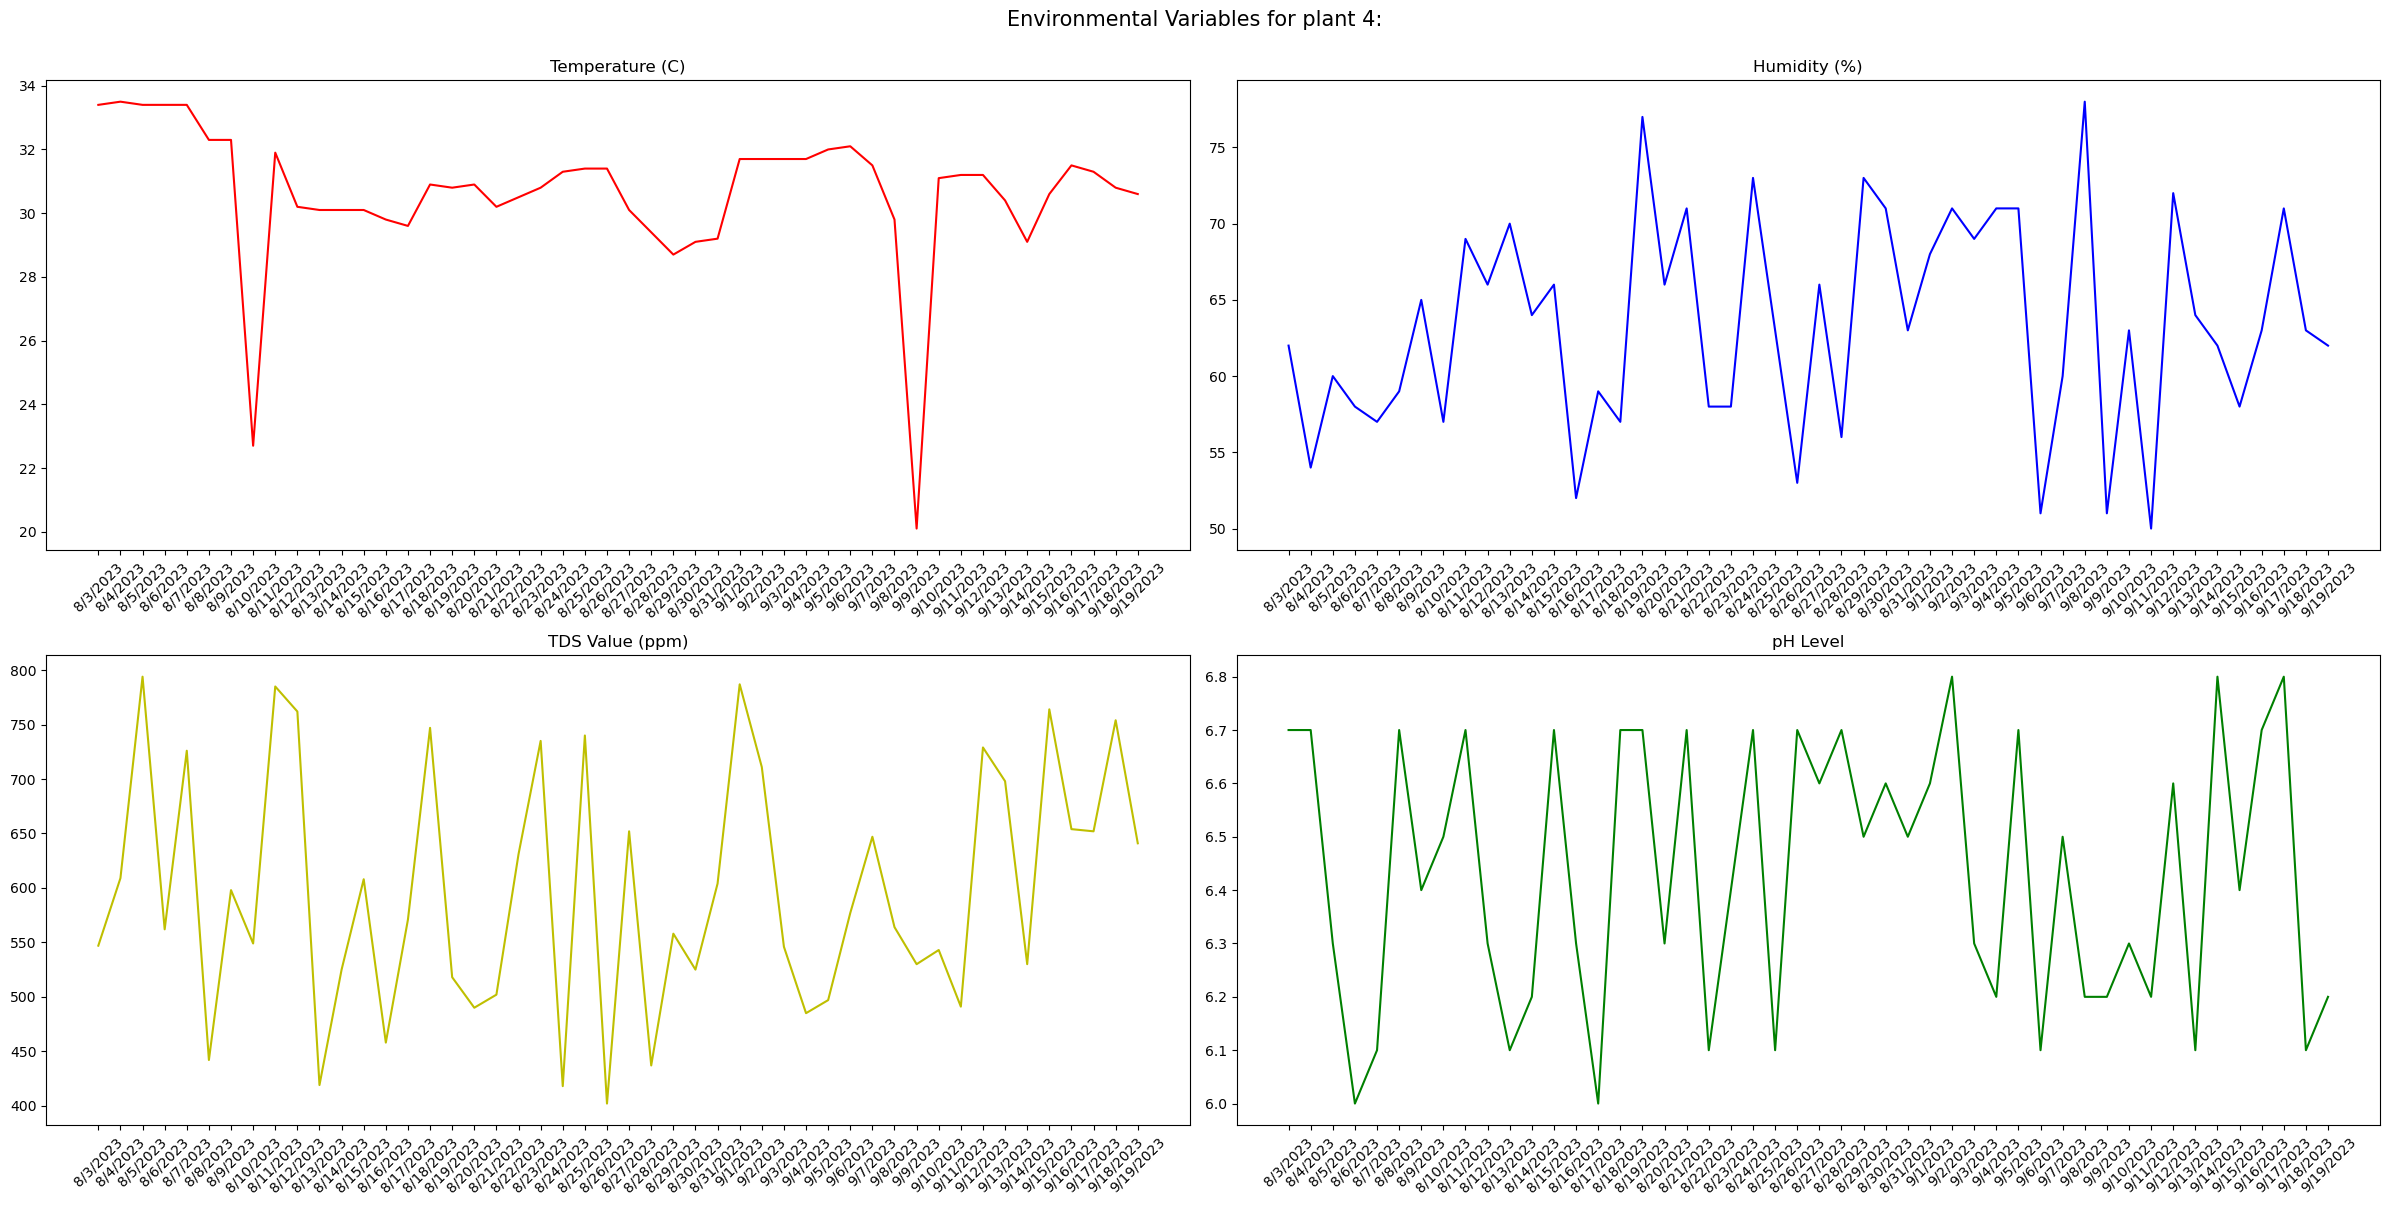

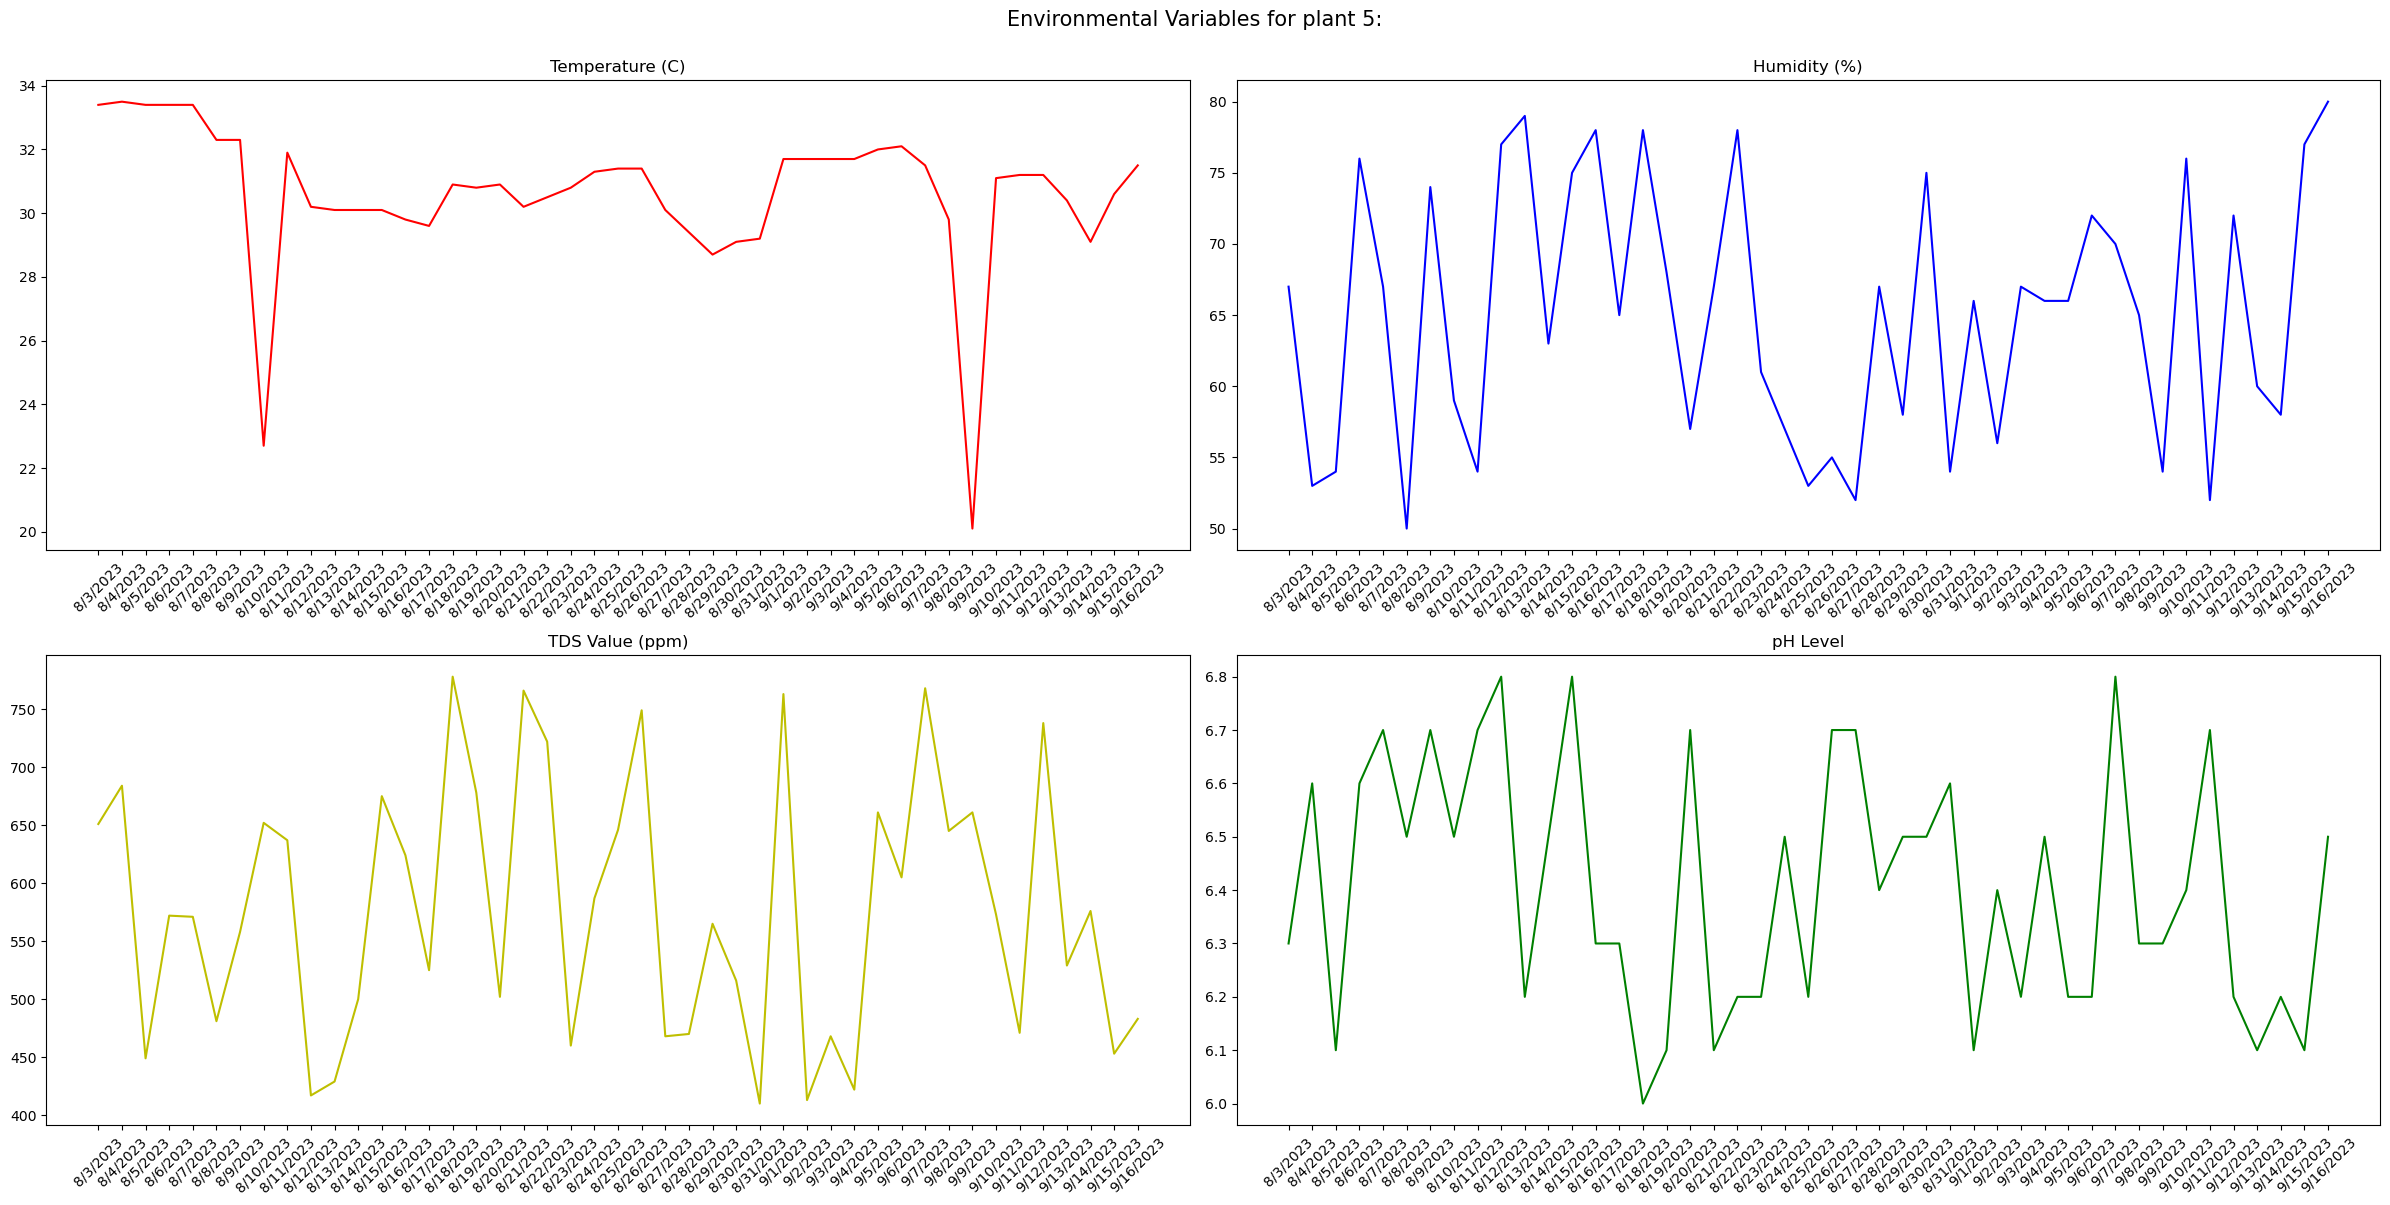

In [151]:
for i in range(1,6):
    environmentVariables(lettuce_df, i)